# Лабораторная №2

Вариант № 17

## Цель работы

Исследование свойств линейной нейронной сети и алгоритмов её обучения, применение сети в задачах аппроксимации и фильтрации.

## Основные этапы работы

1. Использовать линейную нейронную сеть с задержками для аппроксимации функции. В качестве метода обучения использовать адаптацию.
2. Использовать линейную нейронную сеть в качестве адаптивного фильтра для подавления помех. Для настройки весовых коэффициентов использовать метод наименьших квадратов.

## Код

In [221]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [222]:
def plot_history(h, *metrics):
    for metric in metrics: print(f"{metric}: {h.history[metric][-1]:.4f}")
    figure = plt.figure(figsize=(5.25 * len(metrics), 3.75))
    for i, metric in enumerate(metrics, 1):
        ax = figure.add_subplot(1, len(metrics), i)
        ax.xaxis.get_major_locator().set_params(integer=True)
        plt.title(metric)
        plt.plot(h.history[metric], '-')
    plt.show()


### Аппроксимация функции

In [223]:
window = 5 
EPOCHS = 50

In [224]:
def x1(t): return np.sin(np.sin(t)*(t**2) + 3*t - 10)

In [225]:
t1 = np.arange(2.25, 5, 0.01)

Исходный сигнал

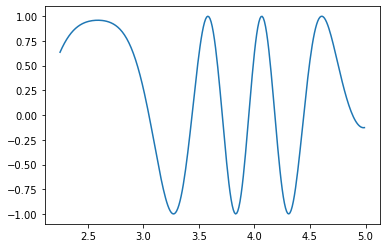

In [226]:
plt.plot(t1, x1(t1))
plt.show()

Подготовка данных

In [227]:
data1 = x1(t1)
target1 = data1[window:]
data1 = np.array([data1[i:i+window] for i in range(0, len(data1) - window)])

Построение и обучение модели

In [228]:
model1 = keras.models.Sequential([ keras.layers.Dense(1, input_dim=window, activation='linear')])

model1.compile(keras.optimizers.SGD(0.01), 'mse', ['mse'])

hist1 = model1.fit(data1, target1, batch_size=1, epochs = EPOCHS, verbose=0, shuffle=True)

mse: 0.0003


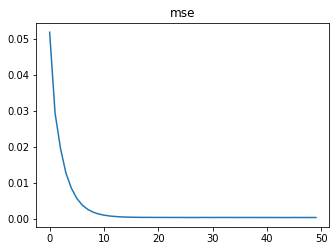

In [229]:
plot_history(hist1, 'mse')

9/9 [==============================] - 0s 2ms/step


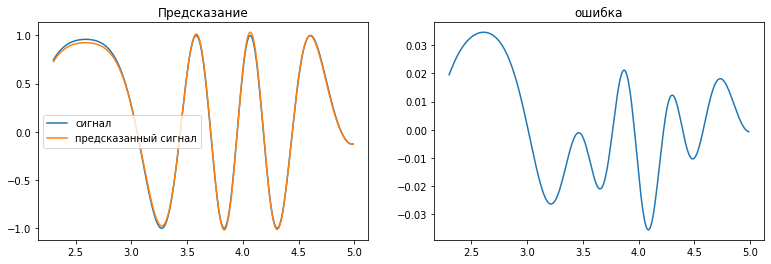

In [230]:
pred1 = model1.predict(data1)
figure = plt.figure(figsize=(13, 4))
figure.add_subplot(1, 2, 1)
plt.title('Предсказание')
plt.plot(t1[window:], target1, label='сигнал')
plt.plot(t1[window:], pred1, label='предсказанный сигнал')
plt.legend()
figure.add_subplot(1, 2, 2)
plt.title('ошибка')
plt.plot(t1[window:], target1 - pred1.flat)
plt.show()

### Фильтрализация

In [231]:
window = 4
EPOCHS = 600

In [232]:
def x2(t): return np.cos(np.cos(t)*(t**2) + 5*t)

In [233]:
def y(t): return 0.2 * np.cos(np.cos(t)*(t**2) + 5*t + 4)

In [234]:
t2 = np.arange(0, 3.5, 0.01)

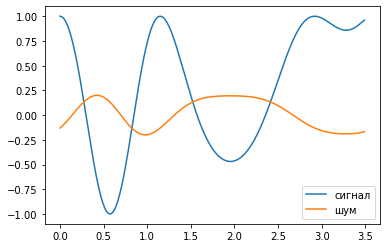

In [235]:
plt.plot(t2, x2(t2), label='сигнал')
plt.plot(t2, y(t2), label='шум')
plt.legend()
plt.show()

Подготовка обучающих данных

In [236]:
data2 = y(t2)
data2 = np.array([data2[i:i+window] for i in range(0, len(data2) - window)])
target2 = x2(t2)[window:]

Построение и обучение модели

In [237]:
model2 = keras.models.Sequential([ keras.layers.Dense(1, input_dim=window, activation='linear')])

model2.compile(keras.optimizers.SGD(0.0055), 'mse', metrics = ["mse"])

hist2 = model2.fit(data2, target2, batch_size=1, epochs = EPOCHS, verbose=0, shuffle=True)

mse: 0.1244


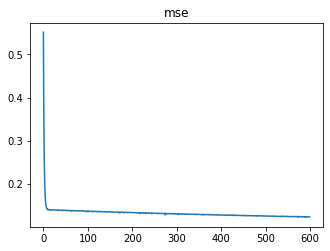

In [238]:
plot_history(hist2, 'mse')

11/11 [==============================] - 0s 2ms/step


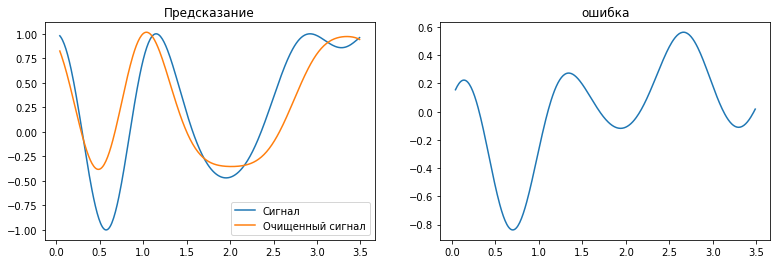

In [239]:
pred2 = model2.predict(data2)
figure = plt.figure(figsize=(13, 4))
figure.add_subplot(1, 2, 1)
plt.title('Предсказание')
plt.plot(t2[window:], target2, label='Сигнал')
plt.plot(t2[window:], pred2, label='Очищенный сигнал')
plt.legend()
figure.add_subplot(1, 2, 2)
plt.title('ошибка')
plt.plot(t2[window:], target2 - pred2.flat)
plt.show()

## Выводы

В ходе выполнения лабораторной работы отработал апроксимацию и фильтрализацию с помощью однослойной нейросети.

Последнее вышло не точно, но чуть улучшилось после увеличения эпох и learning rate.